## Import the necessary libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import requests
import tweepy
import json
from timeit import default_timer as timer
import re

## Data Gathering

###  The WeRateDogs Twitter archive data

In [2]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### The tweet image predictions

In [4]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [5]:
with open ("image_prediction.tsv", mode='wb') as file:
    file.write(response.content)

In [6]:
df2 = pd.read_csv("image_prediction.tsv",sep='\t')

In [7]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df2.shape

(2075, 12)

### Additional data from the Twitter API

In [9]:
%run ./keys.ipynb
# To get my twitter api keys I saved in a another notebook

In [10]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
tweet_ids = df1.tweet_id.values

In [12]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [13]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Fail")
            fails_dict[tweet_id] = 'error'
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Fail
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [14]:
print(len(fails_dict))

30


In [15]:
with open('tweet_json.txt','r') as file:
    tweets = []
    for line in file:
        tweets.append(json.loads(line))   

In [16]:
df3 = pd.DataFrame().from_dict(tweets)

In [17]:
df3.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2040,Mon Nov 30 00:22:57 +0000 2015,671122204919246848,671122204919246848,Two miniature golden retrievers here. Webbed p...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671122197432418304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1542,Thu Jan 14 18:33:48 +0000 2016,687704180304273409,687704180304273409,Say hello to Blakely. He thinks that's a hat. ...,False,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687704170560749568, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1287,Mon Mar 07 00:57:27 +0000 2016,706644897839910912,706644897839910912,Meet Shadow. She's tired of the responsibiliti...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706644797256241152, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
844,Fri Aug 05 21:19:27 +0000 2016,761672994376806400,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761672828462718981, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,in,NaN,NaN,NaN,NaN,NaN
1607,Tue Jan 05 02:30:55 +0000 2016,684200372118904832,684200372118904832,Gang of fearless hoofed puppers here. Straight...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684200328540098561, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


## Assessing Data

Now, assess the 3 datasets both programmatically and visually in order to find data quality and data tidyness issues.

### Visually

In [18]:
# display the 'twitter-archive-enhanced' table
df1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,None,None,None,None
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None


In [19]:
# display 'image-prediction' table
df2.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1428,772826264096874500,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1,basset,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True


In [20]:
# display additional info from twitter api table
df3.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1677,Sat Dec 26 17:41:07 +0000 2015,680805554198020098,680805554198020098,This guy's dog broke. So sad. 9/10 would still...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1502,Thu Jan 21 03:38:27 +0000 2016,690015576308211712,690015576308211712,This pupper can only sleep on shoes. It's a cr...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 690015570461376513, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1370,Tue Feb 16 20:28:06 +0000 2016,699691744225525762,699691744225525762,This is Dave. He's a tropical pup. Short lil l...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699691737665642497, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


### Programmatically

In [21]:
df1['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [22]:
df1.query('rating_denominator != 10')[['rating_denominator','rating_numerator']]

,rating_denominator,rating_numerator
313,0,960
342,15,11
433,70,84
516,7,24
784,11,9
902,150,165
1068,11,9
1120,170,204
1165,20,4
1202,50,50


In [23]:
df1.query('rating_denominator == 10')[['rating_denominator','rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2333.0,2333.000000
mean,10.0,12.237462
std,0.0,41.022472
min,10.0,0.000000
25%,10.0,10.000000
50%,10.0,11.000000
75%,10.0,12.000000
max,10.0,1776.000000


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
df1.shape

(2356, 17)

In [26]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
df1.rating_numerator.value_counts().head(20)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
0        2
15       2
75       2
420      2
182      1
204      1
Name: rating_numerator, dtype: int64

In [28]:
df1.rating_denominator.value_counts().head(20)

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [29]:
df1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
df1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
df1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
df1.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
Bailey       7
Daisy        7
an           7
Buddy        7
Dave         6
Bella        6
Name: name, dtype: int64

In [34]:
df1.tweet_id.duplicated().sum()

0

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df2.shape

(2075, 12)

In [37]:
# get the number of distinct dog types
df2.query('p1_dog == True').p1.nunique()

111

In [38]:
df2.query('p2_dog == True').p2.nunique()

113

In [39]:
df2.query('p3_dog == True').p3.nunique()

116

In [40]:
df2.tweet_id.duplicated().sum()

0

In [41]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2326 non-null   object 
 1   id                             2326 non-null   int64  
 2   id_str                         2326 non-null   object 
 3   full_text                      2326 non-null   object 
 4   truncated                      2326 non-null   bool   
 5   display_text_range             2326 non-null   object 
 6   entities                       2326 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2326 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

(2326, 32)

In [42]:
df3.id.duplicated().sum()

0

In [43]:
# check for duplicated columns across tables
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

### Quality Issues
- <strong>df1(Twitter archive enhanced table)</strong>
1. rating denominators having values not equal to 10 **(consistency issue)**
2. tweet id's is data type integer instead of string **(validity issue)**
3. unoriginal tweets that is tweets that are replies to either status id or another twitter id **(validity issue)**
4. Timestamp is of datetype object instead of datetime **(validity issue)**
5. Drop columns whose language isn't English **(validity)**
6. name column(dog names) have names like None,'a','an','the' **(accuracy issue)**

- **df2(image recognition table)**
7. tweet id's is of data type integer instead of string **(validity issue)**
8. Inconsistency in the number of digits after a decimal point **(consistency issue)**


- **df3(twitter api data table)**
9. too many redundant columns like geo, coordinates, place, contributors e.t.c **(completeness issue)**

### Tidiness Issues
1. df3 should be part of df1(merged together)
- **df1**
2. Timestamp includes both date and time
3. doggo, floofer, pupper, puppo should all be in one column(dog_stage)

- **df3**
4. redundant columns 

## Cleaning Data
In this section, I will clean **all** of the issues documented while assessing. 

In [44]:
# Make copies of original pieces of data
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

In other to avoid repitition of cleaning issues will deal with tidiness isssues 1st thus merge df1 and df3 together

### Category #1: Tidiness Issue

### Issue #1: df1 and df3 should be merged together since they both contain duplicated columns

### Define:
First rename id column in df3 to twitter_id then merge df1 and df3 together as df_1_3

### Code

In [45]:
df3_copy.rename(columns={'id':'tweet_id'},inplace='True')

In [46]:
df_1_3 = df1_copy.merge(df3_copy,on=['tweet_id','source','in_reply_to_status_id','in_reply_to_user_id'],how='inner')

In [47]:
df_1_3.shape

(2325, 45)

In [48]:
df_1_3.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'created_at', 'id_str', 'full_text', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status'],
      dtype='object')

In [49]:
df_1_3.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1574,685906723014619143,NaN,NaN,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olive. He's stuck in a sleeve. 9/10 da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685906723...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2152,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
697,783391753726550016,NaN,NaN,2016-10-04 19:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783391753...,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


### Issue #2: Timestamp includes both date and time

### Define: change the timestamp column from object to datetime then split the column into date and time

### Code

In [50]:
df_1_3.timestamp=pd.to_datetime(df_1_3.timestamp)

In [51]:
df_1_3.timestamp[0]

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

In [52]:
df_1_3['date'] = df_1_3.timestamp.dt.date
df_1_3['time'] = df_1_3.timestamp.dt.time

### Test

In [53]:
df_1_3.date

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2320    2015-11-16
2321    2015-11-16
2322    2015-11-15
2323    2015-11-15
2324    2015-11-15
Name: date, Length: 2325, dtype: object

In [54]:
df_1_3.time

0       16:23:56
1       00:17:27
2       00:18:03
3       15:58:51
4       16:00:24
          ...   
2320    00:24:50
2321    00:04:52
2322    23:21:54
2323    23:05:30
2324    22:32:08
Name: time, Length: 2325, dtype: object

### Issue #3: doggo, floofer, pupper, puppo should all be in one column(dog_stage)

### Define: using string concatenation add the doggo, floofer, pupper, puppo columns together as one column then drop each of the 4 columns 

### Code

In [55]:
df_1_3[['text','doggo','floofer','pupper','puppo']].sample(20)

,text,doggo,floofer,pupper,puppo
650,This is Ralphy. His dreams were just shattered...,None,None,pupper,None
486,This is Brandi and Harley. They are practicing...,None,None,None,None
744,RT @dog_rates: This is Arnie. He's a Nova Scot...,None,None,None,None
674,"""Honestly Kathleen I just want more Ken Bone"" ...",None,None,None,None
911,This is Carl. He's very powerful. 12/10 don't ...,None,None,None,None
2283,This is a golden Buckminsterfullerene named Jo...,None,None,None,None
9,This is Cassie. She is a college pup. Studying...,doggo,None,None,None
23,You may not have known you needed to see this ...,None,None,None,None
1491,This is Cedrick. He's a spookster. Did me a di...,None,None,None,None
2111,Here we see really big dog cuddling smaller do...,None,None,None,None


In [56]:
df_1_3['stage'] = (df_1_3['doggo'].replace('None',"")+df_1_3['floofer'].replace('None',"")+
                   df_1_3['pupper'].replace("None","")+df_1_3['puppo'].replace('None',""))

In [57]:
df_1_3['stage'].sample(20)

112           
702      doggo
457           
2115          
813      doggo
2016          
739     pupper
1976          
1346    pupper
1433          
818           
943     pupper
292           
487           
1011          
896           
562           
402           
798           
720           
Name: stage, dtype: object

In [58]:
# replace empty stage observation with nan
df_1_3['stage'].replace("",np.nan,inplace=True)

### Test

In [59]:
df_1_3[['text','stage']].sample(10)

,text,stage
1876,This pupper just wants a belly rub. This puppe...,pupper
1867,Meet Patrick. He's an exotic pup. Jumps great ...,NaN
1585,This is Hubertson. He's a Carmel Haberdashery....,pupper
1582,This is Rocky. He sleeps like a psychopath. 10...,NaN
821,This is Juno. She can see your future. 12/10 h...,NaN
1409,These two pirates crashed their ship and don't...,NaN
1157,Meet Bowie. He's listening for underground squ...,NaN
1417,12/10 revolutionary af https://t.co/zKzq4nIY86,NaN
1726,Meet Wilson. He got caught humping the futon. ...,NaN
1148,This is Harnold. He accidentally opened the fr...,NaN


In [60]:
df_1_3['stage'].value_counts()

pupper          243
doggo            80
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

### Issue 4: multiple dog stages present

### Define: rename observations with 2 dog stages concatenated together to mixed then drop thedoggo,pupper,floofer and puppo columns

### Code

In [61]:
df_1_3.loc[df_1_3.stage == 'doggopupper', 'stage'] = 'mixed'
df_1_3.loc[df_1_3.stage == 'doggopuppo', 'stage'] = 'mixed'
df_1_3.loc[df_1_3.stage == 'doggofloofer', 'stage'] = 'mixed'

In [62]:
df_1_3['stage'].replace("",np.nan,inplace=True)

In [63]:
df_1_3.drop(columns=['doggo','floofer','pupper','puppo'],inplace = True)

### Test

In [64]:
df_1_3['stage'].value_counts()

pupper     243
doggo       80
puppo       29
mixed       14
floofer      9
Name: stage, dtype: int64

In [65]:
df_1_3.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,date,time,stage
1085,732726085725589504,NaN,NaN,2016-05-18 00:14:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Aldrick. He looks wise af. Also except...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732726085...,...,False,en,NaN,NaN,NaN,NaN,NaN,2016-05-18,00:14:46,NaN
280,837110210464448512,NaN,NaN,2017-03-02 01:20:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,...,False,en,NaN,NaN,NaN,NaN,NaN,2017-03-02,01:20:01,pupper
2092,670385711116361728,NaN,NaN,2015-11-27 23:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,...,False,en,NaN,NaN,NaN,NaN,NaN,2015-11-27,23:36:23,NaN


### Issue 5: Redundant columns

### Define: drop columns that  appear twice or  wont be needing

### Code

In [66]:
df_1_3.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'created_at', 'id_str', 'full_text',
       'truncated', 'display_text_range', 'entities', 'extended_entities',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'date', 'time', 'stage'],
      dtype='object')

In [67]:
df_1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2325 non-null   int64              
 1   in_reply_to_status_id          77 non-null     float64            
 2   in_reply_to_user_id            77 non-null     float64            
 3   timestamp                      2325 non-null   datetime64[ns, UTC]
 4   source                         2325 non-null   object             
 5   text                           2325 non-null   object             
 6   retweeted_status_id            160 non-null    float64            
 7   retweeted_status_user_id       160 non-null    float64            
 8   retweeted_status_timestamp     160 non-null    object             
 9   expanded_urls                  2268 non-null   object             
 10  rating_numerator        

In [68]:
df_1_3.drop(columns=['timestamp','created_at','id_str','geo','coordinates','place','contributors'],inplace=True)

### Test

In [69]:
df_1_3.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'date', 'time', 'stage'],
      dtype='object')

### Issue: rating denominators having values not equal to 10 (consistency issue)

### Define: change all denominator values to 10 

### Code

In [70]:
df_1_3.rating_denominator.value_counts().head(20)

10     2303
50        3
11        2
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [71]:
df_1_3.rating_denominator = 10

### Test

In [72]:
df_1_3.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2320    10
2321    10
2322    10
2323    10
2324    10
Name: rating_denominator, Length: 2325, dtype: int64

### Issue: Unoriginal tweets (validity issue)

### Define: Remove retweets from the dataset

### Code

In [73]:
number_of_retweets = df_1_3['retweeted_status_id'].count()
number_of_retweets

160

In [74]:
df_1_3[~df_1_3.retweeted_status_id.isnull()] #gives a table of retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,date,time,stage
31,886054160059072513,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,...,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN,2017-07-15,02:45:48,NaN
35,885311592912609280,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,...,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN,2017-07-13,01:35:06,NaN
67,879130579576475649,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,...,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN,2017-06-26,00:13:58,NaN
72,878404777348136964,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,...,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN,2017-06-24,00:09:53,NaN
73,878316110768087041,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,...,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN,2017-06-23,18:17:33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,746521445350707200,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,...,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN,NaN,2016-06-25,01:52:36,NaN
1013,743835915802583040,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,...,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN,NaN,2016-06-17,16:01:16,NaN
1212,711998809858043904,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,...,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN,NaN,2016-03-21,19:31:59,NaN
2228,667550904950915073,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,...,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN,2015-11-20,03:51:52,NaN


In [75]:
retweets_index = df_1_3[~df_1_3.retweeted_status_id.isnull()].index

In [76]:
df_1_3.drop(labels=retweets_index,inplace=True)

### Test

In [77]:
df_1_3['retweeted_status_id'].count()

0

In [78]:
df_1_3['retweeted_status_user_id'].count()

0

### Define: Remove replies to tweets from the dataset

### Code

In [79]:
number_of_in_reply_tweets = df_1_3['in_reply_to_user_id'].count()
number_of_in_reply_tweets

77

In [80]:
# table of replies to tweets
df_1_3[~df_1_3.in_reply_to_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,date,time,stage
29,886267009285017600,8.862664e+17,2.281182e+09,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2017-07-15,16:51:35,NaN
54,881633300179243008,8.816070e+17,4.738443e+07,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2017-07-02,21:58:53,NaN
63,879674319642796034,8.795538e+17,3.105441e+09,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2017-06-27,12:14:36,NaN
109,870726314365509632,8.707262e+17,1.648776e+07,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2017-06-02,19:38:25,NaN
142,863427515083354112,8.634256e+17,7.759620e+07,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2017-05-13,16:15:35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,671550332464455680,6.715449e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2015-12-01,04:44:10,NaN
2118,669684865554620416,6.693544e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,...,NaN,en,NaN,NaN,NaN,NaN,NaN,2015-11-26,01:11:28,NaN
2138,669353438988365824,6.678065e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,...,False,en,NaN,NaN,NaN,NaN,NaN,2015-11-25,03:14:30,NaN
2158,668967877119254528,6.689207e+17,2.143566e+07,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,...,NaN,tl,NaN,NaN,NaN,NaN,NaN,2015-11-24,01:42:25,NaN


In [81]:
replies_index = df_1_3[~df_1_3.in_reply_to_user_id.isnull()].index

In [82]:
df_1_3.drop(labels=replies_index,inplace=True)

### Test

In [83]:
df_1_3['in_reply_to_user_id'].count()

0

In [84]:
df_1_3.in_reply_to_status_id.count()

0

### Issue: Tweets not in English(validity issue)

### Define: drop rows whose lang column is not english

### Code

In [85]:
lang_index = df_1_3.query('lang != "en"').index
df_1_3.drop(labels=lang_index,inplace=True)

### Test

In [86]:
df_1_3.lang.unique()

array(['en'], dtype=object)

In [87]:
df_1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2324
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2080 non-null   int64  
 1   in_reply_to_status_id          0 non-null      float64
 2   in_reply_to_user_id            0 non-null      float64
 3   source                         2080 non-null   object 
 4   text                           2080 non-null   object 
 5   retweeted_status_id            0 non-null      float64
 6   retweeted_status_user_id       0 non-null      float64
 7   retweeted_status_timestamp     0 non-null      object 
 8   expanded_urls                  2077 non-null   object 
 9   rating_numerator               2080 non-null   int64  
 10  rating_denominator             2080 non-null   int64  
 11  name                           2080 non-null   object 
 12  full_text                      2080 non-null   o

### Issue: Remove redundant columns

In [88]:
df_1_3.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                     'retweeted_status_timestamp','expanded_urls','truncated','display_text_range','entities','extended_entities',
                     'in_reply_to_status_id_str','in_reply_to_user_id_str','user','is_quote_status','lang','retweeted_status',
                     'quoted_status_id_str','quoted_status_id','quoted_status_permalink','in_reply_to_screen_name'
                    ],inplace=True)

### Test

In [89]:
df_1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2324
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   tweet_id                       2080 non-null   int64 
 1   source                         2080 non-null   object
 2   text                           2080 non-null   object
 3   rating_numerator               2080 non-null   int64 
 4   rating_denominator             2080 non-null   int64 
 5   name                           2080 non-null   object
 6   full_text                      2080 non-null   object
 7   retweet_count                  2080 non-null   int64 
 8   favorite_count                 2080 non-null   int64 
 9   favorited                      2080 non-null   bool  
 10  retweeted                      2080 non-null   bool  
 11  possibly_sensitive             2077 non-null   object
 12  possibly_sensitive_appealable  2077 non-null   object
 13  quo

In [90]:
df_1_3.tweet_id.astype('str')

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2320    666049248165822465
2321    666044226329800704
2322    666033412701032449
2323    666029285002620928
2324    666020888022790149
Name: tweet_id, Length: 2080, dtype: object

### Issue: name column(dog names) have names like None,'a','an','the' (accuracy issue)

In [91]:
df_1_3.query("['a','an','the'] in name")[['name','text']]

,name,text
55,a,Here is a pupper approaching maximum borkdrive...
627,a,Here is a perfect example of someone who has t...
777,a,Guys this is getting so out of hand. We only r...
972,a,This is a mighty rare blue-tailed hammer sherk...
974,a,Viewer discretion is advised. This is a terrib...
...,...,...
2318,an,This is an odd dog. Hard on the outside but lo...
2319,a,This is a truly beautiful English Wilson Staff...
2321,a,This is a purebred Piers Morgan. Loves to Netf...
2322,a,Here is a very happy pup. Big fan of well-main...


### Define: simply rename to unnamed

### Code

In [92]:
df_1_3.query("['a','an','the'] in name")['name'].replace(['a','an','the'],'unnamed')

55      unnamed
627     unnamed
777     unnamed
972     unnamed
974     unnamed
         ...   
2318    unnamed
2319    unnamed
2321    unnamed
2322    unnamed
2323    unnamed
Name: name, Length: 69, dtype: object

### Issue: Inconsistency in the number of digits after a decimal point in df2 (consistency issue)

### Define: select a standard for number of digits after decimal points 

### Code

In [93]:
df2_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [94]:
df2_copy = df2_copy.round({'p1_conf':3,'p2_conf':3,'p3_conf':3})

### Test

In [95]:
df2_copy.tweet_id.astype('str')

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

### Issue: df2_copy should be merged with df_1_3

In [96]:
df = df_1_3.merge(df2_copy,on='tweet_id',how='inner')

In [97]:
df.sample(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,full_text,retweet_count,favorite_count,favorited,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1812,668627278264475648,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,9,10,Timofy,This is Timofy. He's a pilot for Southwest. It...,97,281,False,...,1,French_bulldog,0.965,True,pug,0.009,True,Boston_bull,0.008,True
1332,681242418453299201,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,10,10,Champ,This is Champ. He's being sacrificed to the Az...,470,1359,False,...,1,motor_scooter,0.256,False,rifle,0.145,False,assault_rifle,0.097,False
262,829449946868879360,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,11,10,None,Here's a stressed doggo. Had a long day. Many ...,1863,9892,False,...,1,Labrador_retriever,0.315,True,golden_retriever,0.153,True,Pekinese,0.133,True


### EDA

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1954
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1955 non-null   int64  
 1   source                         1955 non-null   object 
 2   text                           1955 non-null   object 
 3   rating_numerator               1955 non-null   int64  
 4   rating_denominator             1955 non-null   int64  
 5   name                           1955 non-null   object 
 6   full_text                      1955 non-null   object 
 7   retweet_count                  1955 non-null   int64  
 8   favorite_count                 1955 non-null   int64  
 9   favorited                      1955 non-null   bool   
 10  retweeted                      1955 non-null   bool   
 11  possibly_sensitive             1955 non-null   object 
 12  possibly_sensitive_appealable  1955 non-null   o

In [99]:
df.tweet_id = df.tweet_id.astype('str')

In [154]:
df.drop(columns=['full_text'],inplace=True)

In [100]:
df.drop(columns=['quoted_status'],inplace=True)

In [101]:
df[df.duplicated()]

,tweet_id,source,text,rating_numerator,rating_denominator,name,full_text,retweet_count,favorite_count,favorited,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [102]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1955.000000,1955.0,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,12.226598,10.0,2249.334015,7748.785678,1.203069,0.594195,0.134727,0.060282
std,41.804001,0.0,4006.637928,11405.511998,0.560734,0.271985,0.101006,0.051020
min,0.000000,10.0,11.000000,66.000000,1.000000,0.044000,0.000000,0.000000
25%,10.000000,10.0,501.500000,1665.500000,1.000000,0.363000,0.054000,0.016000
50%,11.000000,10.0,1092.000000,3508.000000,1.000000,0.587000,0.118000,0.049000
75%,12.000000,10.0,2584.000000,9648.500000,1.000000,0.847000,0.196000,0.092000
max,1776.000000,10.0,70742.000000,144893.000000,4.000000,1.000000,0.488000,0.273000


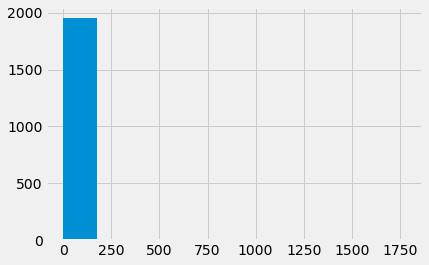

In [103]:
df.rating_numerator.hist();

In [104]:
df.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

### Issue: Extremly high rating_numerator values

### Define: confirm whether this error is as a result of a mistake while collecting the information programmatically from the text column. If it's not then just replace these values with the mode

### Code

In [105]:
def score(text):
    numbs = re.findall('[0-9]+',text)
    return numbs

In [106]:
df['nums'] = df['text'].apply(score)

In [107]:
df['nums']

0                    [13, 10, 76]
1                 [13, 10, 0, 71]
2                        [12, 10]
3                 [13, 10, 36, 7]
4                 [12, 10, 91, 7]
                  ...            
1950    [1949, 1, 5, 10, 4, 7, 1]
1951                   [6, 10, 2]
1952                 [9, 10, 671]
1953          [2, 7, 10, 7, 2, 0]
1954                   [8, 10, 2]
Name: nums, Length: 1955, dtype: object

In [108]:
pd.set_option('display.max_colwidth',None)

In [109]:
df.query('rating_numerator > 14')[['text','nums','rating_numerator']]

,text,nums,rating_numerator
315,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"[84, 70, 820]",84
377,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"[24, 7, 98, 8, 7, 7, 5]",24
494,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS","[9, 75, 10, 5]",75
543,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,"[11, 27, 10]",27
650,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,"[165, 150]",165
713,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,"[1776, 10]",1776
832,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,"[204, 170, 3, 3]",204
908,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,"[50, 50, 11, 10, 1, 4]",50
929,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,"[9, 99, 90, 1]",99
953,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,"[80, 80, 0, 7, 1, 12]",80


In [110]:
# manually change some of the values
df.iloc[495,3] = 10
df.iloc[544,3] = 12
df.iloc[909,3] = 11
df.iloc[1348,3] = 12

In [111]:
numerator_mode = df.rating_numerator.mode()
numerator_mode

0    12
dtype: int64

In [145]:
# values that couldn't be xhanged manually should be assigned the mode value
df.loc[df.rating_numerator > 14,'rating_numerator'] = 12

### Test

In [147]:
df.rating_numerator.unique()

array([13, 12, 14,  5, 11,  6, 10,  0,  7,  8,  9,  4,  3,  2,  1],
      dtype=int64)

In [114]:
df.drop(columns=['nums'],inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 1954
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1955 non-null   object 
 1   source                         1955 non-null   object 
 2   text                           1955 non-null   object 
 3   rating_numerator               1955 non-null   int64  
 4   rating_denominator             1955 non-null   int64  
 5   name                           1955 non-null   object 
 6   full_text                      1955 non-null   object 
 7   retweet_count                  1955 non-null   int64  
 8   favorite_count                 1955 non-null   int64  
 9   favorited                      1955 non-null   bool   
 10  retweeted                      1955 non-null   bool   
 11  possibly_sensitive             1955 non-null   object 
 12  possibly_sensitive_appealable  1955 non-null   o

In [148]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1955.000000,1955.0,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,10.534527,10.0,2249.334015,7748.785678,1.203069,0.594195,0.134727,0.060282
std,2.181200,0.0,4006.637928,11405.511998,0.560734,0.271985,0.101006,0.051020
min,0.000000,10.0,11.000000,66.000000,1.000000,0.044000,0.000000,0.000000
25%,10.000000,10.0,501.500000,1665.500000,1.000000,0.363000,0.054000,0.016000
50%,11.000000,10.0,1092.000000,3508.000000,1.000000,0.587000,0.118000,0.049000
75%,12.000000,10.0,2584.000000,9648.500000,1.000000,0.847000,0.196000,0.092000
max,14.000000,10.0,70742.000000,144893.000000,4.000000,1.000000,0.488000,0.273000


### Feature Engineering
- Create a single column for hour of the day
- Create a single column for month

In [172]:
df.time = df.time.astype('str')

In [182]:
hours = df.time.str.split(':',expand=True)[0]

In [188]:
# hours column created
df['hours'] = hours
df.hours = df.hours.astype('int')

In [189]:
df.hours.unique()

array([16,  0, 15,  1, 17,  3, 23, 20, 22, 21, 19, 18, 14,  4,  2,  6,  5,
       13])

<AxesSubplot:>

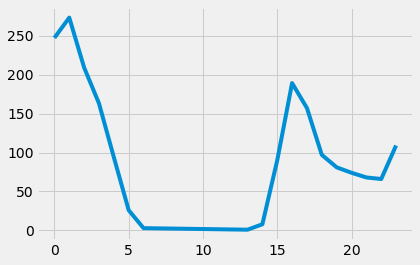

In [197]:
df.hours.value_counts().sort_index().plot()

### Create single column for months

In [203]:
df.date = df.date.astype('str')

In [213]:
df['months'] = df.date.str.split('-',expand=True)[1].astype('int')

<AxesSubplot:>

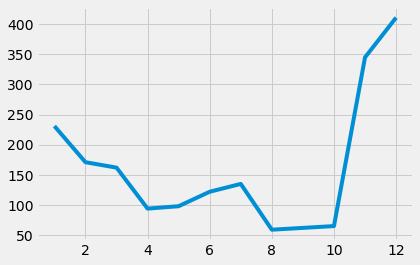

In [215]:
df.months.value_counts().sort_index().plot()

### Storing Data

In this section, the gathered, assessed, and cleaned master dataset will be saved into a CSV file named "twitter_archive_master.csv".

In [149]:
df.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and Visualizing data

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

In [151]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1955.000000,1955.0,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,10.534527,10.0,2249.334015,7748.785678,1.203069,0.594195,0.134727,0.060282
std,2.181200,0.0,4006.637928,11405.511998,0.560734,0.271985,0.101006,0.051020
min,0.000000,10.0,11.000000,66.000000,1.000000,0.044000,0.000000,0.000000
25%,10.000000,10.0,501.500000,1665.500000,1.000000,0.363000,0.054000,0.016000
50%,11.000000,10.0,1092.000000,3508.000000,1.000000,0.587000,0.118000,0.049000
75%,12.000000,10.0,2584.000000,9648.500000,1.000000,0.847000,0.196000,0.092000
max,14.000000,10.0,70742.000000,144893.000000,4.000000,1.000000,0.488000,0.273000


### Question 1: What dog stage has the most likes and retweets

In [223]:
df_stage = df.groupby('stage')[['retweet_count','favorite_count']].sum()

In [265]:
df_stage = df_stage.reset_index()
df_stage

,stage,retweet_count,favorite_count
0,floofer,27905,78580
1,mixed,48747,158491
2,puppo,117176,430611
3,doggo,370378,1091396
4,pupper,386973,1256519


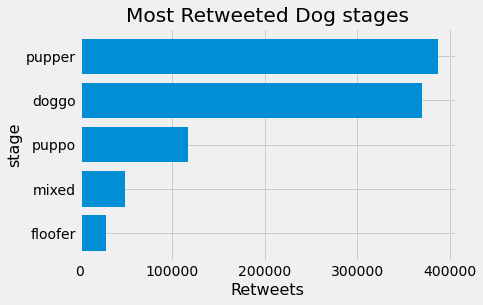

In [432]:
labels = [1,2,3,4,5]
dog_stages = df_stage.stage
df_stage.sort_values('retweet_count',inplace=True)
plt.barh(labels,df_stage.retweet_count)
plt.xlabel('Retweets',fontsize=16)
plt.ylabel('stage',fontsize=16)
plt.yticks(labels,dog_stages)
plt.title('Most Retweeted Dog stages')
plt.savefig('Images/Most Retweeted Dog stages',bbox_inches='tight');

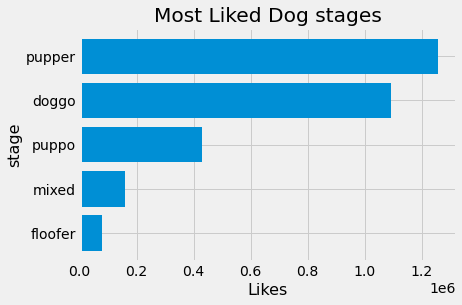

In [426]:
labels = [1,2,3,4,5]
dog_stages = df_stage.stage
df_stage.sort_values('favorite_count',inplace=True)
plt.barh(labels,df_stage.favorite_count)
plt.xlabel('Likes',fontsize=16)
plt.ylabel('stage',fontsize=16)
plt.yticks(labels,dog_stages)
plt.title('Most Liked Dog stages')
plt.savefig('Images/Most Liked Dog stages',bbox_inches='tight');

It's evident that pupper and doggo are the two most liked and most retweet dog stages. Now, I have to check if the reason for this is because most dogs are in this stages

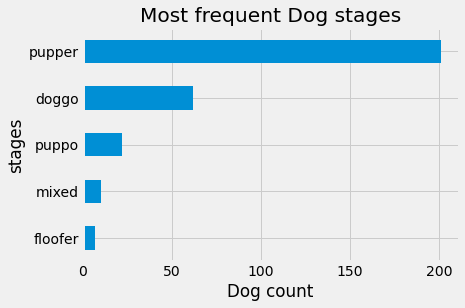

In [425]:
df.stage.value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Dog count')
plt.ylabel('stages')
plt.title('Most frequent Dog stages')
plt.savefig('Images/Most frequent Dog stages',bbox_inches='tight');

Here we can see that pupper is the most frequent dog stage this means that the most known dog stage was pupper. doggo is the next but not so close to pupper.

df.stage.value_counts(ascending=True)

In [367]:
total_dog_stages = df.stage.value_counts(ascending=True).sum()

In [373]:
df.stage.value_counts(ascending=True)/total_dog_stages * 100

floofer     2.317881
mixed       3.311258
puppo       7.284768
doggo      20.529801
pupper     66.556291
Name: stage, dtype: float64

From this we can see that about **67%** of dogs were in **the pupper** stage and just **20% were in the doggo stage** yet dogs in the doggo stage had as much likes and retweets as dogs in the pupper stage

### Question 2: What dog-type has the most likes/retweets

In [294]:
df_dogtype = df.query('p1_dog==True')[['p1','retweet_count','favorite_count']]

In [295]:
df_dogtype.sample(3)

,p1,retweet_count,favorite_count
1930,malamute,58,179
627,Gordon_setter,1102,3886
1511,Pomeranian,80,580


In [386]:
test_dogtype = df_dogtype.groupby('p1').sum()[['favorite_count','retweet_count']]

In [387]:
test_dogtype = test_dogtype.reset_index()

In [388]:
test_dogtype

,p1,favorite_count,retweet_count
0,Afghan_hound,44128,14362
1,Airedale,53926,13439
2,American_Staffordshire_terrier,63478,18077
3,Appenzeller,12540,2284
4,Australian_terrier,19105,5005
...,...,...,...
106,toy_poodle,201104,71261
107,toy_terrier,7653,1869
108,vizsla,82959,20748
109,whippet,66933,16955


In [389]:
# dog breed with the most likes
test_dogtype[test_dogtype.favorite_count==test_dogtype.favorite_count.max()]

,p1,favorite_count,retweet_count
87,golden_retriever,1471413,407683


In [390]:
# dog breed with the least likes
test_dogtype[test_dogtype.favorite_count==test_dogtype.favorite_count.min()]

,p1,favorite_count,retweet_count
34,Japanese_spaniel,1114,354


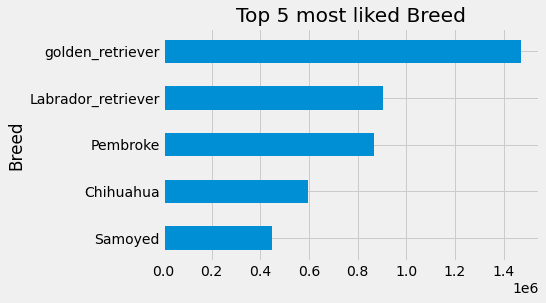

In [433]:
df_dogtype.groupby('p1').sum()['favorite_count'].sort_values(ascending = True).tail(5).plot(kind='barh')
plt.ylabel('Breed')
plt.title('Top 5 most liked Breed')
plt.savefig('Images/Most liked Breed',bbox_inches='tight');

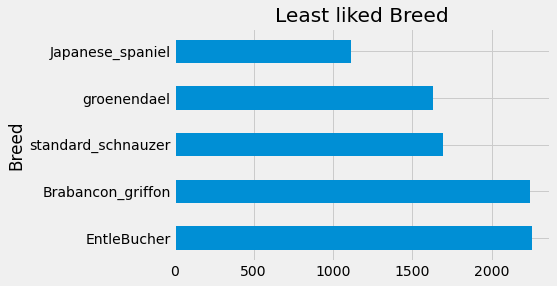

In [434]:
df_dogtype.groupby('p1').sum()['favorite_count'].sort_values(ascending = False).tail(5).plot(kind='barh')
plt.ylabel('Breed')
plt.title('Least liked Breed')
plt.savefig('Images/Least liked Breed',bbox_inches='tight');

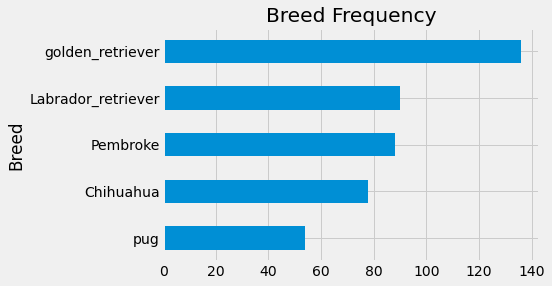

In [435]:
df_dogtype.p1.value_counts().head(5).sort_values().plot(kind='barh')
plt.ylabel('Breed')
plt.title('Breed Frequency')
plt.savefig('Images/Most Common Breed',bbox_inches='tight');

This shows that **golden retriever, Labrador retriever, Pembroke and Chihuahua** were the most liked dog breed and this could be as a result of them being the most reoccuring .

In [391]:
# dog breed with the most likes
test_dogtype[test_dogtype.retweet_count==test_dogtype.retweet_count.max()]

,p1,favorite_count,retweet_count
87,golden_retriever,1471413,407683


In [392]:
# dog breed with the least likes
test_dogtype[test_dogtype.favorite_count==test_dogtype.favorite_count.min()]

,p1,favorite_count,retweet_count
34,Japanese_spaniel,1114,354


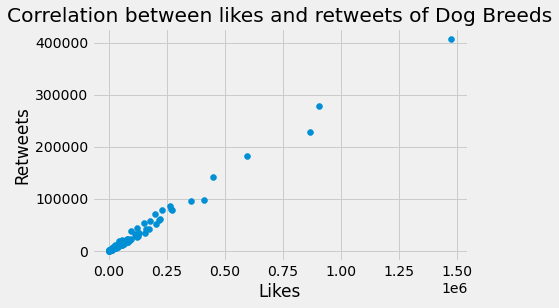

In [441]:
plt.scatter(test_dogtype.favorite_count,test_dogtype.retweet_count)
plt.title('Correlation between likes and retweets of Dog Breeds')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.savefig('Images/breeds likes and retweets.png',bbox_inches='tight');

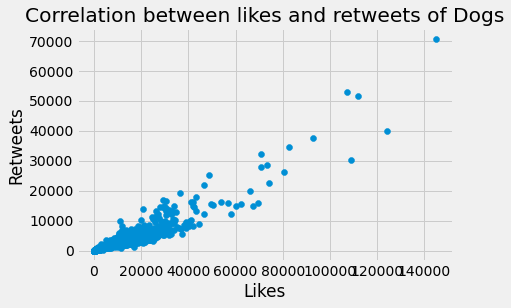

In [440]:
plt.scatter(df.favorite_count,df.retweet_count)
plt.title('Correlation between likes and retweets of Dogs')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.savefig('Images/dogs likes and retweets.png',bbox_inches='tight');

### What time does WeRateDogs has the most traffic?

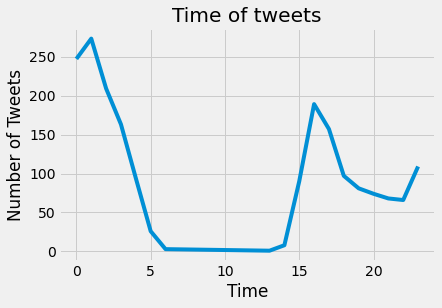

In [443]:
df.hours.value_counts().sort_index().plot()
plt.title('Time of tweets')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.savefig('Images/time of tweets.png',bbox_inches='tight');

### What month does WeRateDogs have the most traffic?

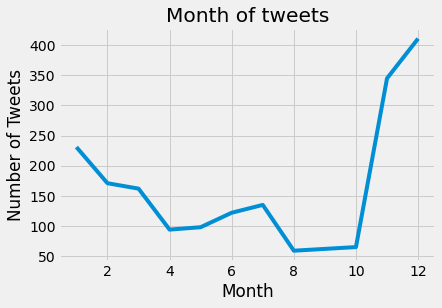

In [445]:
df.months.value_counts().sort_index().plot()
plt.title('Month of tweets')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.savefig('Images/month of tweets.png',bbox_inches='tight');

### Relationship between ratings and likes/retweets

In [418]:
df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,hours,months
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,7009,33806,False,False,...,0.097,False,bagel,0.086,False,banana,0.076,False,16,8
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5301,29330,False,False,...,0.324,True,Pekinese,0.091,True,papillon,0.069,True,00,8
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3481,22051,False,False,...,0.716,True,malamute,0.078,True,kelpie,0.031,True,00,7
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7225,36938,False,False,...,0.170,False,Labrador_retriever,0.168,True,spatula,0.041,False,15,7
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,7760,35308,False,False,...,0.556,True,English_springer,0.226,True,German_short-haired_pointer,0.175,True,16,7


In [422]:
mean_rating = df['retweet_count'].mean()
mean_rating

2249.3340153452687

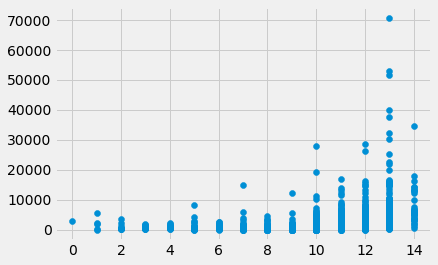

In [420]:
plt.scatter(df['rating_numerator'],df['retweet_count'])

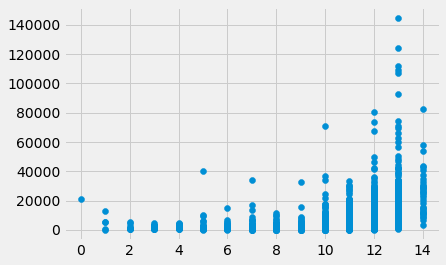

In [423]:
plt.scatter(df['rating_numerator'],df['favorite_count'])

### INSIGHTS
- Very few dogs had known stages
- pupper and doggo were the two most liked and retweeted dog stages not surprising because they were the two most occuring dog stages. One important thing I noticed was that though the number of dogs in the pupper stage was far more than those in the doggo stage, dogs in the doggo stage almost had the same number of likes and retweets as their pupper counterparts
- High correlation between likes and retweets
- WeRateDogs mostly tweet around 12am or 1am and least tweet around 6am to 2pm
- Lot's of people wanted to know their dog rating in the months of October to December